# **Visualize Block-Trial frequency**

In [1]:
# Import library
import function.process_freq as func
import pandas as pd
import os

In [9]:
### Configuration
# ===Experiment config===
n_trial = 64    
n_block = 18
# =======================

### Configuration
# Please change monitor frequency same as monitor refresh rate
monitor_frequency = 60      # Acer 60hz test monitor
# monitor_frequency = 120     # NX monitor 

sr = 500    # Photocell Sampling rate
threshold = 300     # Photocell threshold

In [10]:
# Subject ID
subject = 1

process_path = 'process_data'
subject_path = f's{subject}'

=====block_1=====
All markers present.


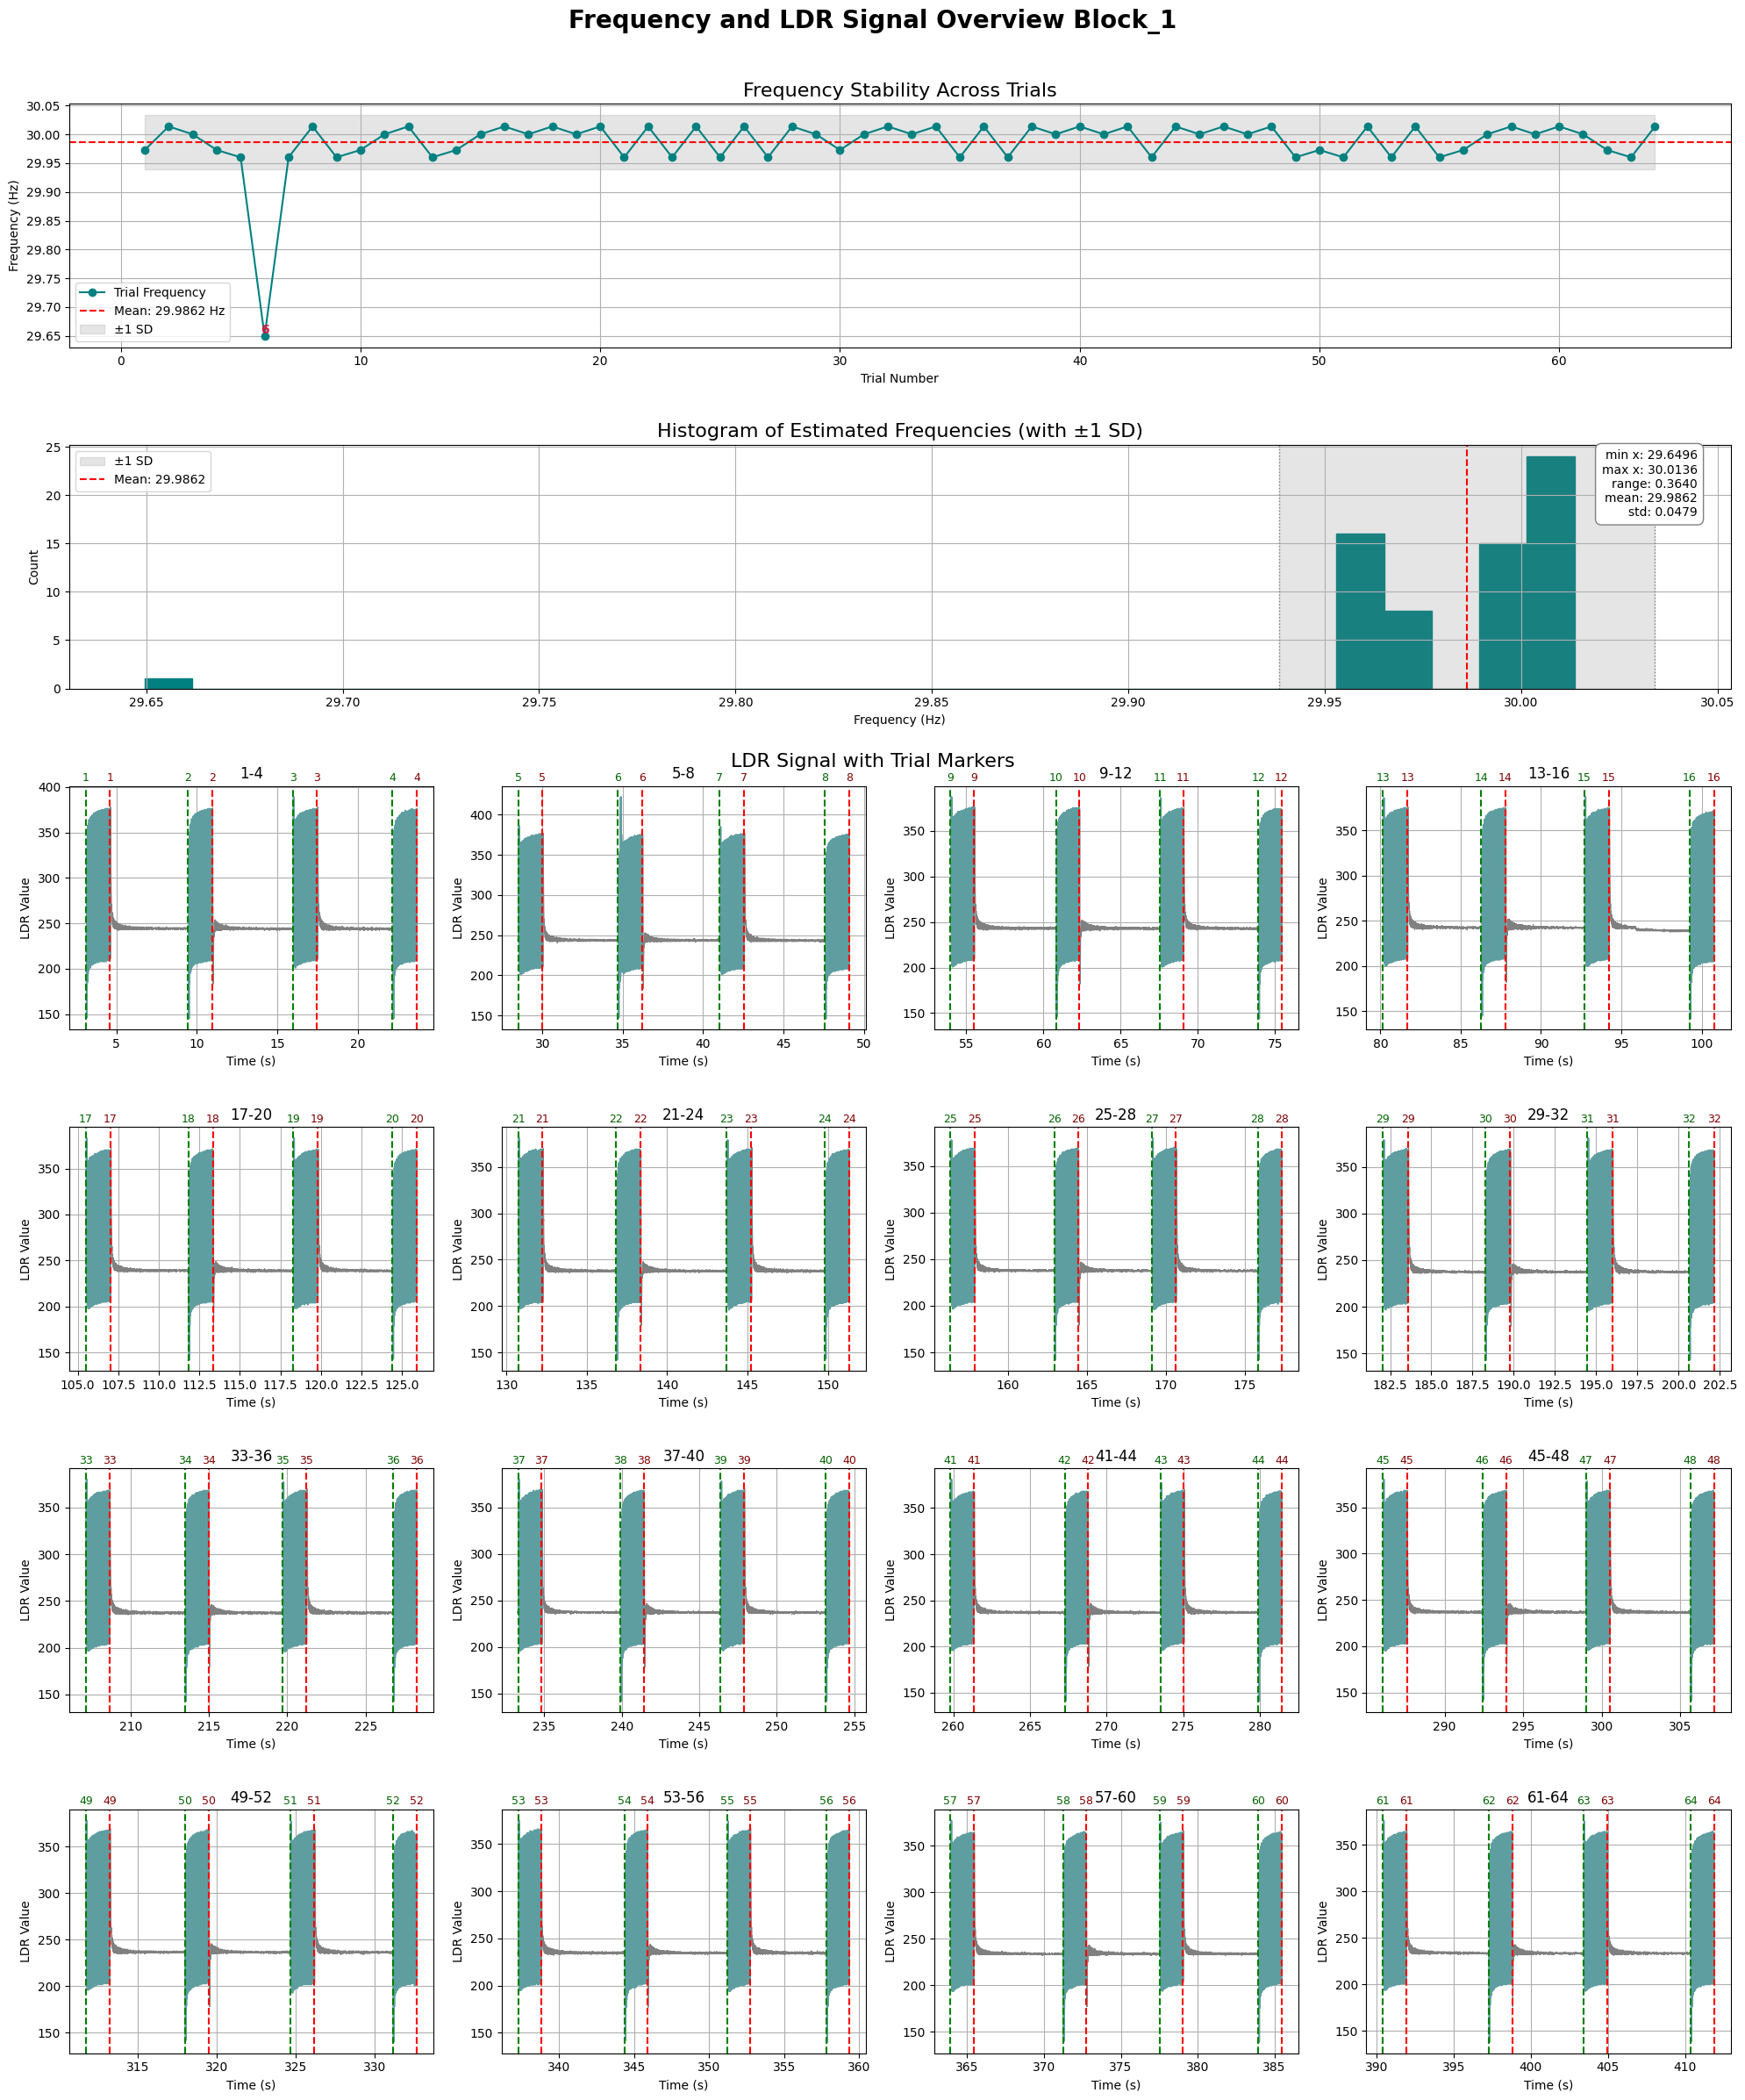

=====block_2=====
All markers present.


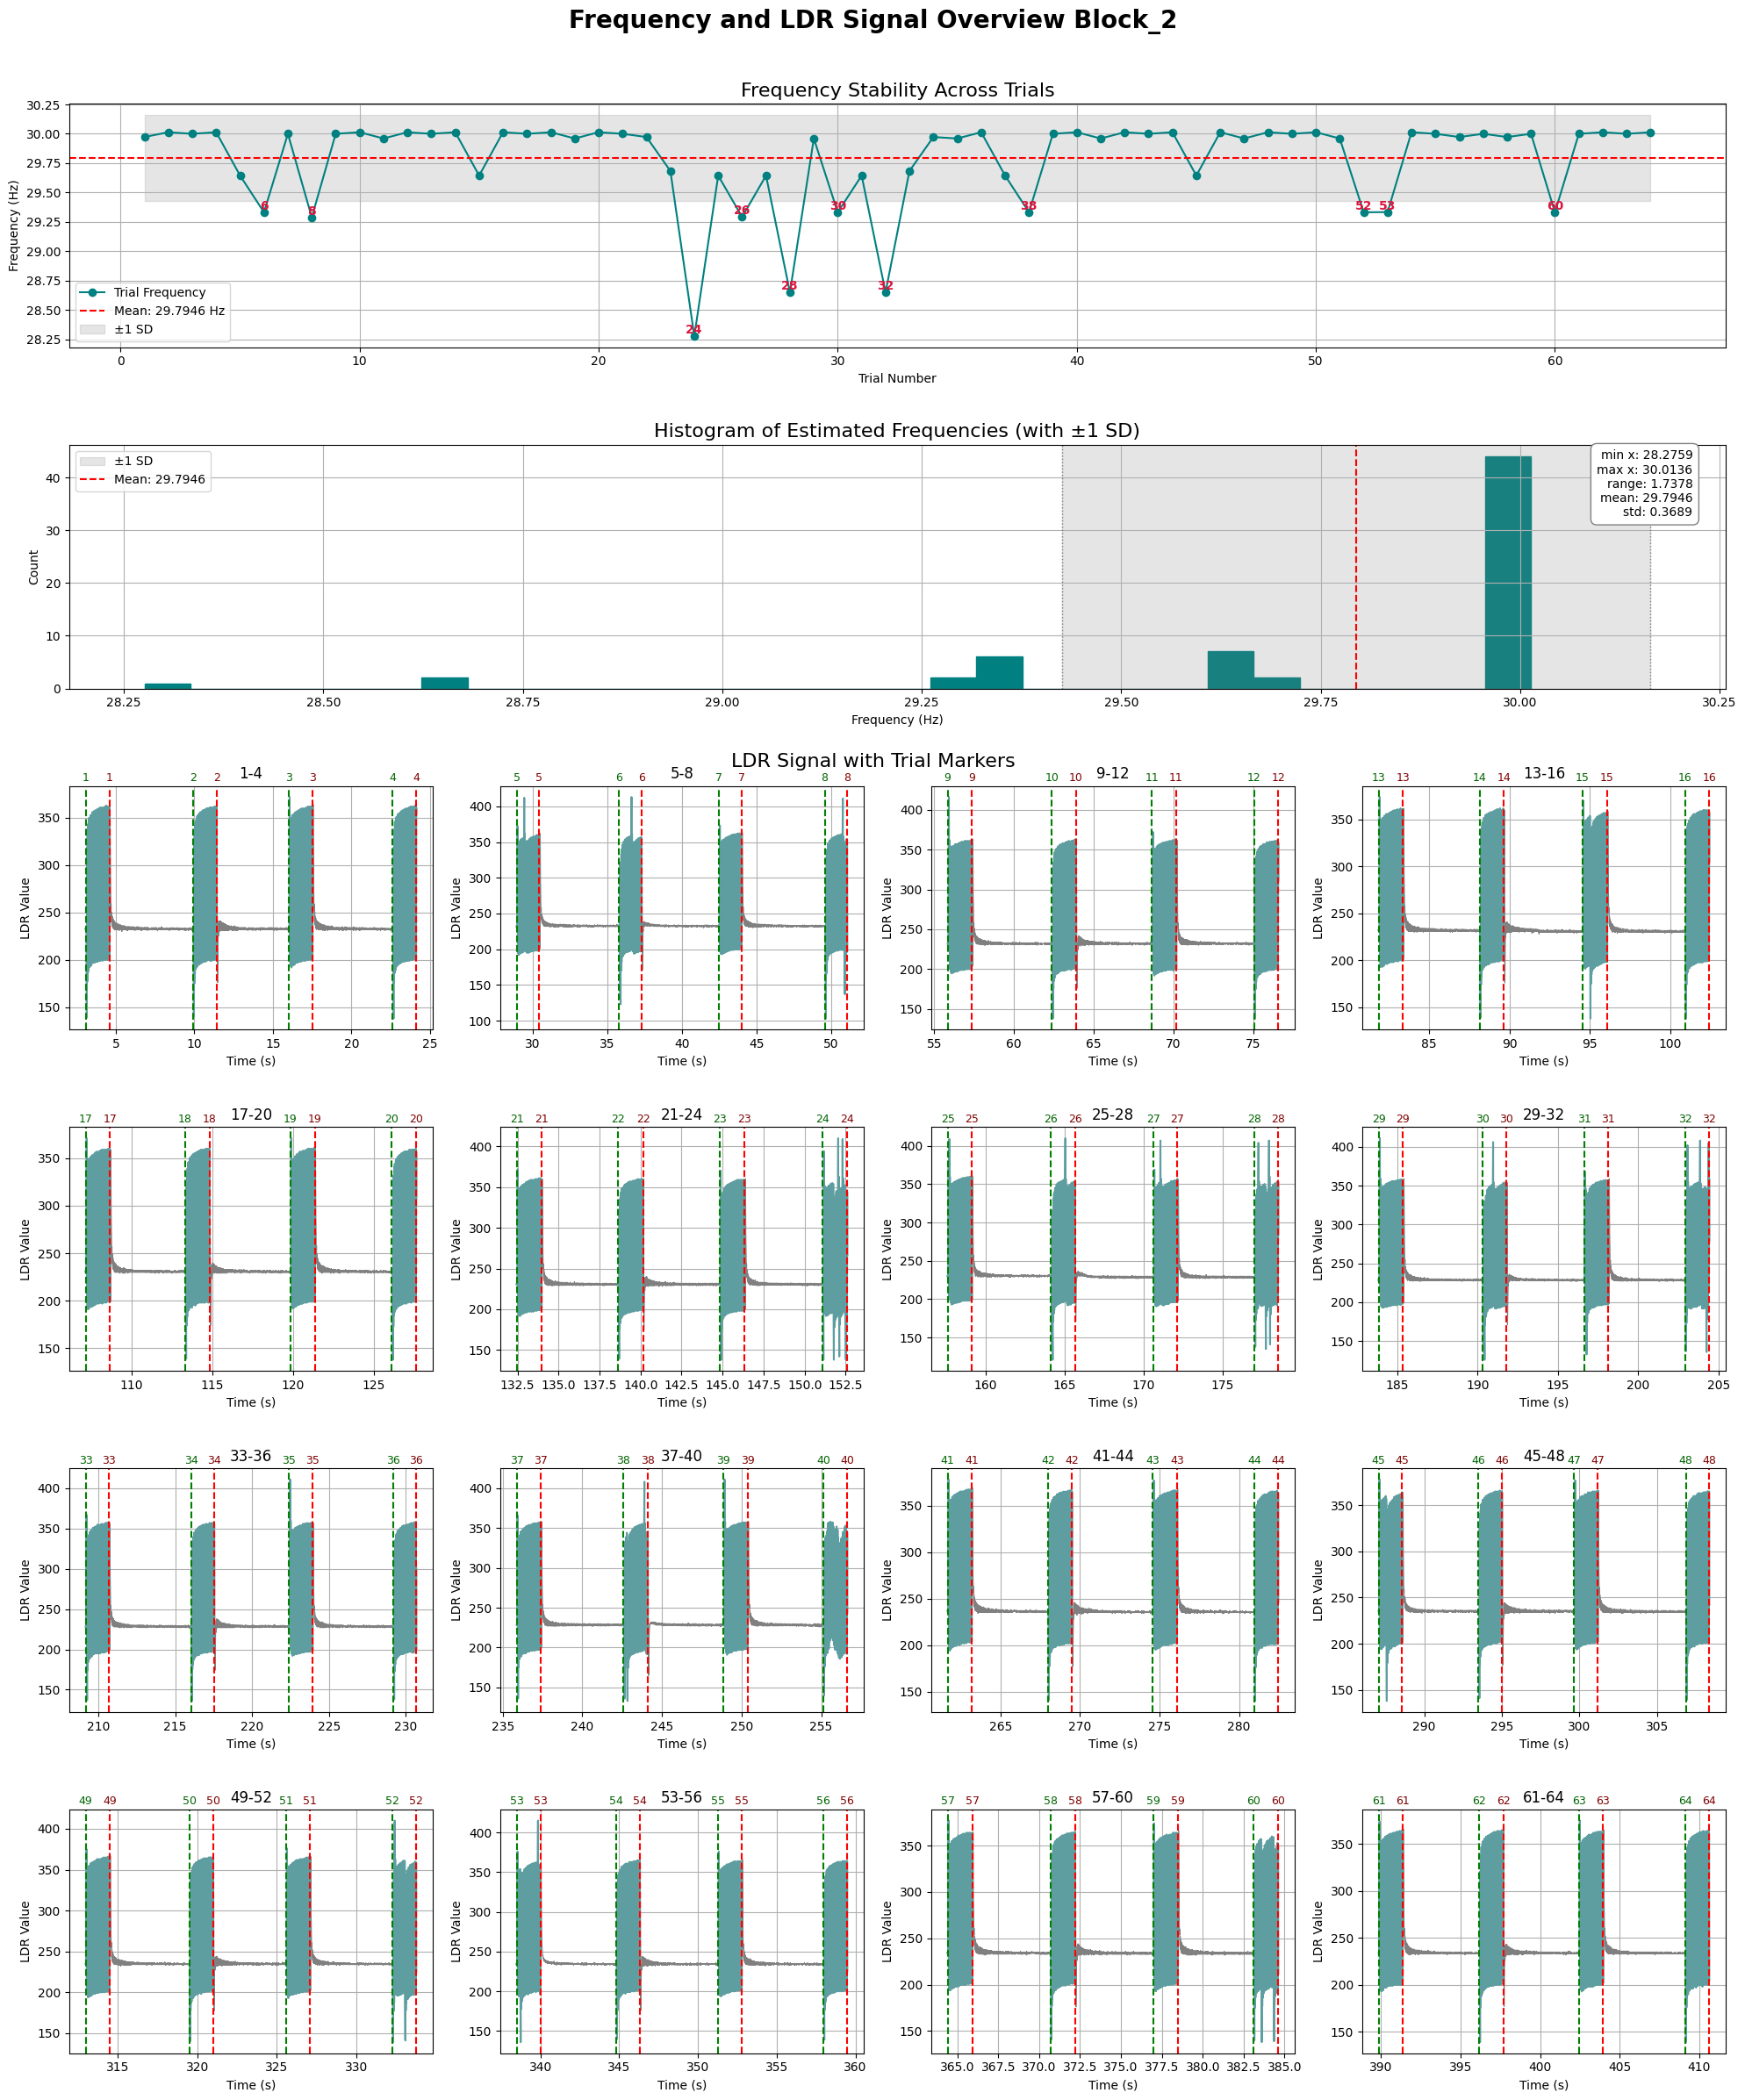

=====block_3=====
All markers present.


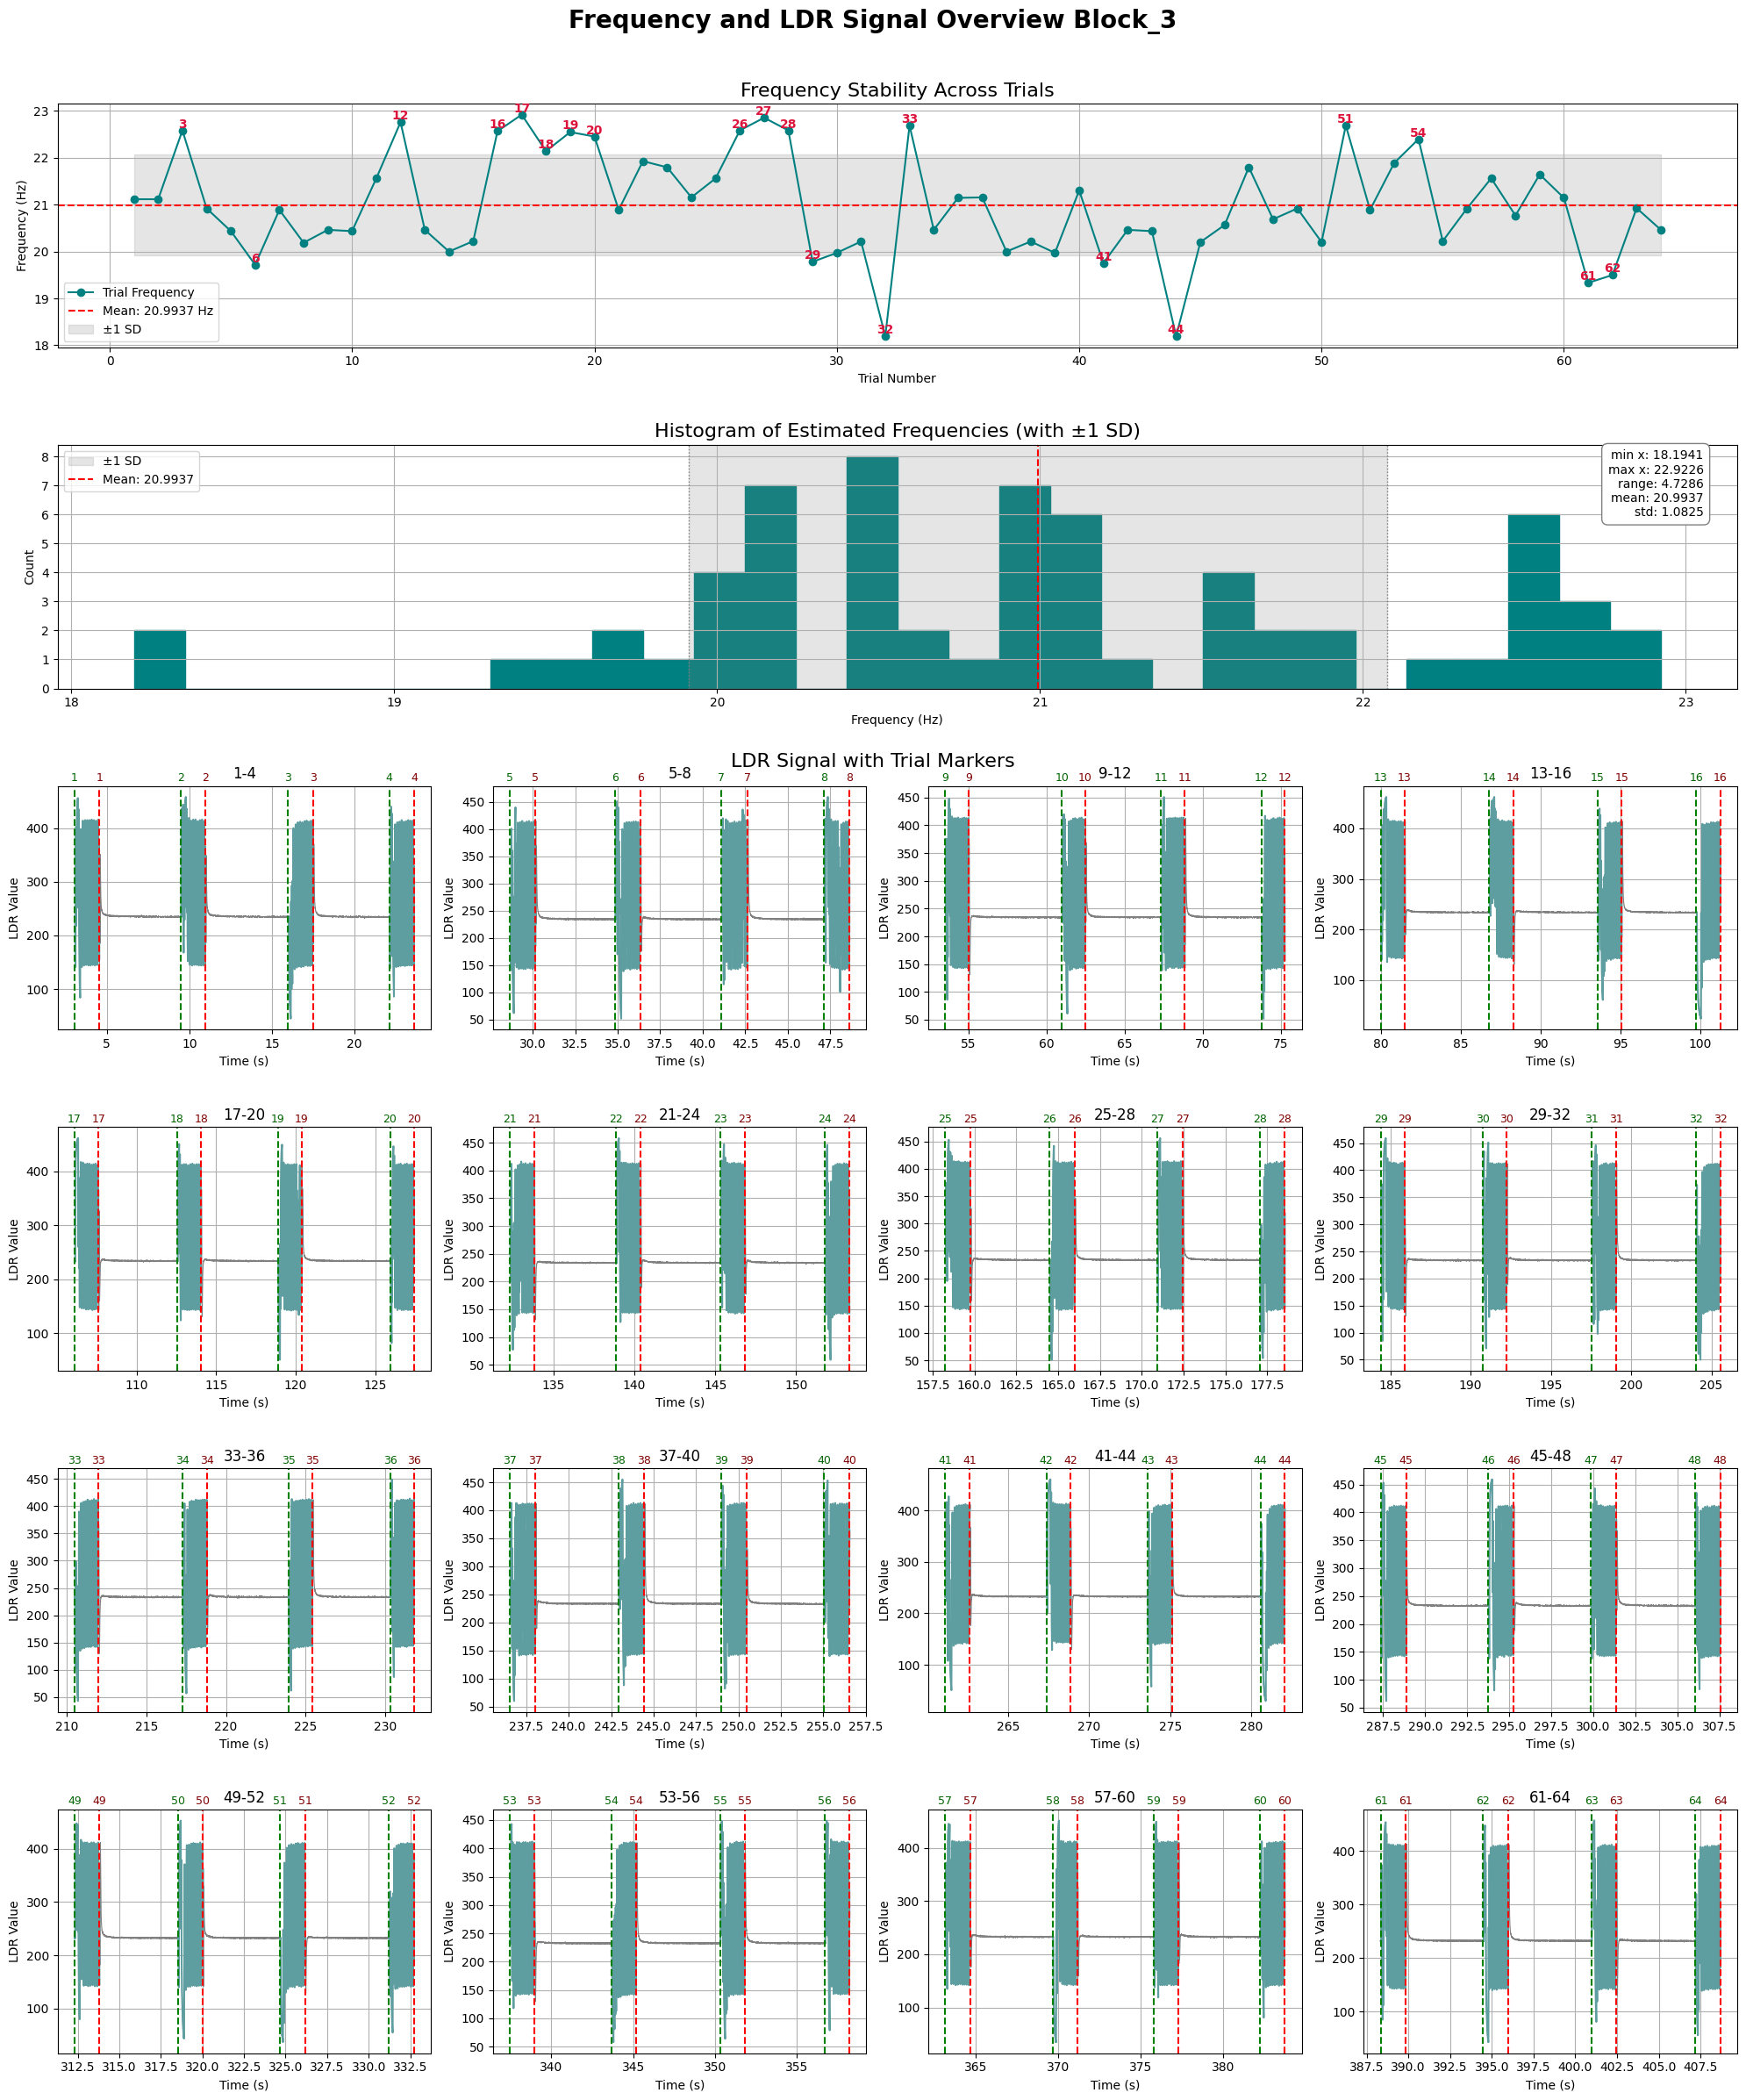

Block 4 file note found
Block 5 file note found
Block 6 file note found
Block 7 file note found
Block 8 file note found
Block 9 file note found
Block 10 file note found
Block 11 file note found
Block 12 file note found
Block 13 file note found
Block 14 file note found
Block 15 file note found
Block 16 file note found
Block 17 file note found
Block 18 file note found


In [11]:
for i in range(1,n_block+1):
    # Load Data
    filename = f's{subject}_block_{i}_process.csv'
    filename = os.path.join(process_path,subject_path, filename)
    try:
        df = pd.read_csv(filename)
        df = func.preprocess_ldr(df)
        print(f"=====block_{i}=====")
        
        # Check missing marker
        func.check_missing_marker(df, total_trials=n_trial)  
        
        # Find average frequency each trial 
        trial_labels, freqs = func.collect_frequencies(df,num_trial=n_trial, monitor_freq=monitor_frequency, sr=sr,threshold=threshold)
        
        # Plot overall freq check
        func.plot_all_frequency_and_ldr(df, block_num=i, n_trial=n_trial, frequencies=freqs, trial_labels=trial_labels)
        
    except FileNotFoundError:
        print(f"Block {i} file note found")

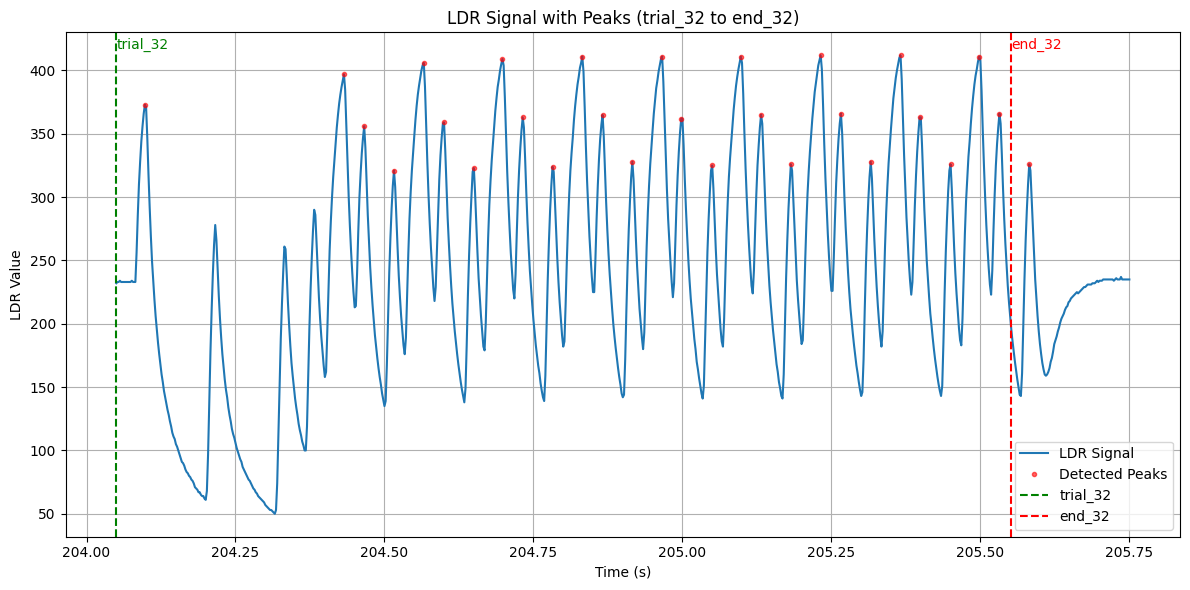

Frequency: 18.1941 Hz, Peaks: 28, Est. Period: 0.0550 sec


In [4]:
# Plot specific Block-Trial
block_id = 3
trial_num = 32

try:
    filename = f's{subject}_block_{block_id}_process.csv'
    filename = os.path.join(process_path,subject_path, filename)
    df = pd.read_csv(filename)
    df = func.preprocess_ldr(df)

    func.plot_peaks_in_trial(df, f'trial_{trial_num}', f'end_{trial_num}', distance=15, height=threshold)
        
    # For specific plot 
    # func.plot_ldr_data_with_markers(df=df)  # plot all photocell_value-marker
    # func.plot_frequency_stability(trial_labels, freqs)
    # func.plot_hist_freq(freqs=freqs)
except FileNotFoundError:
    print(f"File Block: {block_id}, trial: {trial_num} Not found")